In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import bs4 as bs
import re

import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")

In [2]:
#BAJAR INFORMACIÓN AUTOMÁTICAMENTE PARA UN CIK
#SE PUEDEN BUSCAR ACÁ -> https://www.sec.gov/edgar/searchedgar/cik.htm

headers = { 'User-Agent': 'Mozilla/5.0', } 

#Hacer un diccionario con emisores, CIKs, etc
# CIK = '0001326801' #-> Facebook
# CIK = '0001065280' #-> Netflix
# CIK = '0000789019' #-> Microsoft
# CIK = '0001318605' # -> Tesla
CIK = '0001018724' #-> Amazon
# CIK = '0001577552' #-> ALIBABA GROUP HOLDING LTD

   

#Bajar la información desde el sitio web de la fed y ponerlo en formato json
download = requests.get('https://data.sec.gov/api/xbrl/companyfacts/CIK'+CIK+'.json', stream=True, headers = headers)
fin_statment = download.json()

#Sacar los facts según US_GAAP o IFRS
us_gaap_concepts = list(fin_statment['facts']['us-gaap'].keys())
# ifrs_concepts = list(fin_statment['facts']['ifrs-full'].keys())

us_gaap_concepts

['AccountsPayable',
 'AccountsPayableCurrent',
 'AccountsReceivableNetCurrent',
 'AccruedLiabilities',
 'AccruedLiabilitiesCurrent',
 'AccruedLiabilitiesForUnredeeemedGiftCards',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax',
 'AcquiredFiniteLivedIntangibleAssetWeightedAverageUsefulLife',
 'AdditionalPaidInCapital',
 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther',
 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation',
 'AdvertisingExpense',
 'AllocatedShareBasedCompensationExpense',
 'AllowanceForDoubtfulAccountsReceivable',
 'AllowanceForDoubtfulAccountsReceivableCurrent',
 'AllowanceForDoubtfulAccountsReceivableWriteOffs',
 'AmortizationOfAcquiredIntangibleAsset

In [3]:
#Assets
Assets_list = fin_statment['facts']['us-gaap']['Assets']['units']['USD']
Assets_df = pd.DataFrame(Assets_list)
Assets_df

,end,val,accn,fy,fp,form,filed,frame
0,2008-12-31,8314000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
1,2008-12-31,8314000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
2,2008-12-31,8314000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2008Q4I
3,2009-06-30,7675000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
4,2009-09-30,8972000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
104,2020-12-31,321195000000,0001018724-22-000005,2021,FY,10-K,2022-02-04,CY2020Q4I
105,2021-03-31,323077000000,0001018724-21-000010,2021,Q1,10-Q,2021-04-30,CY2021Q1I
106,2021-06-30,360319000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2I
107,2021-09-30,382406000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [4]:
#AssetsCurrent
AssetsCurrent_list = fin_statment['facts']['us-gaap']['AssetsCurrent']['units']['USD']
AssetsCurrent_df = pd.DataFrame(AssetsCurrent_list)
AssetsCurrent_df

,end,val,accn,fy,fp,form,filed,frame
0,2008-12-31,6157000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
1,2008-12-31,6157000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
2,2008-12-31,6157000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2008Q4I
3,2009-06-30,5304000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
4,2009-09-30,6369000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
97,2020-12-31,132733000000,0001018724-22-000005,2021,FY,10-K,2022-02-04,CY2020Q4I
98,2021-03-31,121408000000,0001018724-21-000010,2021,Q1,10-Q,2021-04-30,CY2021Q1I
99,2021-06-30,140848000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2I
100,2021-09-30,138531000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [5]:
#LiabilitiesCurrent
LiabilitiesCurrent_list = fin_statment['facts']['us-gaap']['LiabilitiesCurrent']['units']['USD']
LiabilitiesCurrent_df = pd.DataFrame(LiabilitiesCurrent_list)
LiabilitiesCurrent_df

,end,val,accn,fy,fp,form,filed,frame
0,2008-12-31,4746000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
1,2008-12-31,4746000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
2,2008-12-31,4746000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2008Q4I
3,2009-06-30,3636000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
4,2009-09-30,4537000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
97,2020-12-31,126385000000,0001018724-22-000005,2021,FY,10-K,2022-02-04,CY2020Q4I
98,2021-03-31,115404000000,0001018724-21-000010,2021,Q1,10-Q,2021-04-30,CY2021Q1I
99,2021-06-30,117792000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2I
100,2021-09-30,123994000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [6]:
#OtherLiabilitiesNoncurrent
LiabilitiesNonCurrent_list = fin_statment['facts']['us-gaap']['OtherLiabilitiesNoncurrent']['units']['USD']
LiabilitiesNonCurrent_df = pd.DataFrame(LiabilitiesNonCurrent_list)
LiabilitiesNonCurrent_df

,end,val,accn,fy,fp,form,filed,frame
0,2008-12-31,487000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
1,2008-12-31,487000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
2,2008-12-31,487000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2008Q4I
3,2009-06-30,674000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
4,2009-09-30,734000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
85,2020-12-31,17017000000,0001018724-22-000005,2021,FY,10-K,2022-02-04,CY2020Q4I
86,2021-03-31,19418000000,0001018724-21-000010,2021,Q1,10-Q,2021-04-30,CY2021Q1I
87,2021-06-30,21148000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2I
88,2021-09-30,23945000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [7]:
#LiabilitiesAndStockholdersEquity
LiabilitiesAndStockholdersEquity_list = fin_statment['facts']['us-gaap']['LiabilitiesAndStockholdersEquity']['units']['USD']
LiabilitiesAndStockholdersEquity_df = pd.DataFrame(LiabilitiesAndStockholdersEquity_list)
LiabilitiesAndStockholdersEquity_df

,end,val,accn,fy,fp,form,filed,frame
0,2008-12-31,8314000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
1,2008-12-31,8314000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
2,2008-12-31,8314000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2008Q4I
3,2009-06-30,7675000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
4,2009-09-30,8972000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
97,2020-12-31,321195000000,0001018724-22-000005,2021,FY,10-K,2022-02-04,CY2020Q4I
98,2021-03-31,323077000000,0001018724-21-000010,2021,Q1,10-Q,2021-04-30,CY2021Q1I
99,2021-06-30,360319000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2I
100,2021-09-30,382406000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [8]:
#StockholdersEquity
StockholdersEquity_list = fin_statment['facts']['us-gaap']['StockholdersEquity']['units']['USD']
StockholdersEquity_df = pd.DataFrame(StockholdersEquity_list)
StockholdersEquity_df

,end,val,accn,fy,fp,form,filed,frame
0,2006-12-31,431000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2006Q4I
1,2007-12-31,1197000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,NaN
2,2007-12-31,1197000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2007Q4I
3,2008-12-31,2672000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
4,2008-12-31,2672000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
...,...,...,...,...,...,...,...,...
153,2021-03-31,103320000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q1I
154,2021-06-30,114803000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,NaN
155,2021-06-30,114803000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q2I
156,2021-09-30,120564000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3I


In [9]:
#NetIncomeLoss
NetIncomeLoss_list = fin_statment['facts']['us-gaap']['NetIncomeLoss']['units']['USD']
NetIncomeLoss_df = pd.DataFrame(NetIncomeLoss_list)
NetIncomeLoss_df

,start,end,val,accn,fy,fp,form,filed,frame
0,2007-01-01,2007-12-31,476000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2007
1,2007-07-01,2008-06-30,588000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
2,2008-01-01,2008-06-30,301000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
3,2008-04-01,2008-06-30,158000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2008Q2
4,2007-10-01,2008-09-30,627000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
...,...,...,...,...,...,...,...,...,...
326,2021-04-01,2021-06-30,7778000000,0001018724-21-000020,2021,Q2,10-Q,2021-07-30,CY2021Q2
327,2020-10-01,2021-09-30,26263000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,NaN
328,2021-01-01,2021-09-30,19041000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,NaN
329,2021-07-01,2021-09-30,3156000000,0001018724-21-000028,2021,Q3,10-Q,2021-10-29,CY2021Q3


In [10]:
#DepreciationAndAmortization
DepreciationAndAmortization_list = fin_statment['facts']['us-gaap']['DepreciationAndAmortization']['units']['USD']
DepreciationAndAmortization_df = pd.DataFrame(DepreciationAndAmortization_list)
DepreciationAndAmortization_df

,start,end,val,accn,fy,fp,form,filed,frame
0,2007-01-01,2007-12-31,246000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2007
1,2007-07-01,2008-06-30,259000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
2,2008-01-01,2008-06-30,134000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,NaN
3,2008-04-01,2008-06-30,70000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2008Q2
4,2007-10-01,2008-09-30,273000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,NaN
...,...,...,...,...,...,...,...,...,...
147,2016-01-01,2016-09-30,5819000000,0001018724-16-000324,2016,Q3,10-Q,2016-10-28,NaN
148,2016-07-01,2016-09-30,2084000000,0001018724-16-000324,2016,Q3,10-Q,2016-10-28,CY2016Q3
149,2016-01-01,2016-12-31,8116000000,0001018724-17-000011,2016,FY,10-K,2017-02-10,CY2016
150,2016-04-01,2017-03-31,8725000000,0001018724-17-000051,2017,Q1,10-Q,2017-04-28,NaN


In [11]:
NetIncomeLoss_df['start'] = pd.to_datetime(NetIncomeLoss_df['start'])
NetIncomeLoss_df['end'] = pd.to_datetime(NetIncomeLoss_df['end'])
NetIncomeLoss_df['dias'] = (NetIncomeLoss_df['end']-NetIncomeLoss_df['start']).dt.days

# new_row = {'start':datetime(2021,9,30), 
#            'end':datetime(2021,12,31), 
#            'val':14323000000, 
#            'accn':'AAA', 
#            'fy':'AAA', 
#            'fp':'AAA', 
#            'form':'AAA', 
#            'filed':'AAA',            
#            'frame':'CY',            
#            'dias':90}
# fin_statment_df = fin_statment_df.append(new_row, ignore_index=True)

# fin_statment_df['start'].iloc[-1] = datetime(2021,9,30)
# fin_statment_df['end'].iloc[-1] = datetime(2021,12,31)
# fin_statment_df['val'].iloc[-1] = 17719000000
# fin_statment_df['frame'].iloc[-1] = 'CY'
# fin_statment_df['dias'].iloc[-1] = 90


NetIncomeLoss_df_to_plot = NetIncomeLoss_df.dropna()
NetIncomeLoss_df_to_plot = NetIncomeLoss_df_to_plot[NetIncomeLoss_df_to_plot['frame'].str.contains('CY')]
NetIncomeLoss_df_to_plot = NetIncomeLoss_df_to_plot[NetIncomeLoss_df_to_plot['dias']<100]
NetIncomeLoss_df_to_plot

,start,end,val,accn,fy,fp,form,filed,frame,dias
3,2008-04-01,2008-06-30,158000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2008Q2,90
6,2008-07-01,2008-09-30,118000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2008Q3,91
11,2009-01-01,2009-03-31,177000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q1,89
18,2009-04-01,2009-06-30,142000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q2,90
25,2009-07-01,2009-09-30,199000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q3,91
29,2009-10-01,2009-12-31,384000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q4,91
35,2010-01-01,2010-03-31,299000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q1,89
43,2010-04-01,2010-06-30,207000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q2,90
51,2010-07-01,2010-09-30,231000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q3,91
56,2010-10-01,2010-12-31,416000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q4,91


In [12]:
#StockholdersEquity_df['start'] = pd.to_datetime(StockholdersEquity_df['start'])
StockholdersEquity_df['end'] = pd.to_datetime(StockholdersEquity_df['end'])
#StockholdersEquity_df['dias'] = (StockholdersEquity_df['end']-StockholdersEquity_df['start']).dt.days

# new_row = {'start':datetime(2021,9,30), 
#            'end':datetime(2021,12,31), 
#            'val':14323000000, 
#            'accn':'AAA', 
#            'fy':'AAA', 
#            'fp':'AAA', 
#            'form':'AAA', 
#            'filed':'AAA',            
#            'frame':'CY',            
#            'dias':90}
# fin_statment_df = fin_statment_df.append(new_row, ignore_index=True)

# fin_statment_df['start'].iloc[-1] = datetime(2021,9,30)
# fin_statment_df['end'].iloc[-1] = datetime(2021,12,31)
# fin_statment_df['val'].iloc[-1] = 17719000000
# fin_statment_df['frame'].iloc[-1] = 'CY'
# fin_statment_df['dias'].iloc[-1] = 90


StockholdersEquity_df_to_plot = StockholdersEquity_df.dropna()
StockholdersEquity_df_to_plot = StockholdersEquity_df_to_plot[StockholdersEquity_df_to_plot['frame'].str.contains('CY')]
#StockholdersEquity_df_to_plot = StockholdersEquity_df_to_plot[StockholdersEquity_df_to_plot['form']=='10-Q']
#StockholdersEquity_df_to_plot = StockholdersEquity_df_to_plot[StockholdersEquity_df_to_plot['dias']<100]
StockholdersEquity_df_to_plot

,end,val,accn,fy,fp,form,filed,frame
0,2006-12-31,431000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2006Q4I
2,2007-12-31,1197000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2007Q4I
7,2008-12-31,2672000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2008Q4I
8,2009-06-30,3256000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I
9,2009-09-30,3585000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I
16,2009-12-31,5257000000,0001193125-13-028520,2012,FY,10-K,2013-01-30,CY2009Q4I
17,2010-03-31,5618000000,0001193125-10-090367,2010,Q1,10-Q,2010-04-23,CY2010Q1I
18,2010-06-30,5857000000,0001193125-10-164083,2010,Q2,10-Q,2010-07-23,CY2010Q2I
19,2010-09-30,6397000000,0001193125-10-233883,2010,Q3,10-Q,2010-10-22,CY2010Q3I
26,2010-12-31,6864000000,0001018724-14-000006,2013,FY,10-K,2014-01-31,CY2010Q4I


In [43]:
df_final = pd.merge(StockholdersEquity_df_to_plot,
                        NetIncomeLoss_df_to_plot[['end','val']], 
                        left_on='end',right_on='end', how='left')

df_final['cum_NI'] = df_final['val_y'].rolling(window=4).sum()
df_final['ROE'] = df_final['cum_NI']/df_final['val_x']
df_final

,end,val_x,accn,fy,fp,form,filed,frame,val_y,cum_NI,ROE
0,2006-12-31,431000000,0001193125-10-016098,2009,FY,10-K,2010-01-29,CY2006Q4I,NaN,NaN,NaN
1,2007-12-31,1197000000,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2007Q4I,NaN,NaN,NaN
2,2008-12-31,2672000000,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2008Q4I,NaN,NaN,NaN
3,2009-06-30,3256000000,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2009Q2I,1.420000e+08,NaN,NaN
4,2009-09-30,3585000000,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2009Q3I,1.990000e+08,NaN,NaN
5,2009-12-31,5257000000,0001193125-13-028520,2012,FY,10-K,2013-01-30,CY2009Q4I,3.840000e+08,NaN,NaN
6,2010-03-31,5618000000,0001193125-10-090367,2010,Q1,10-Q,2010-04-23,CY2010Q1I,2.990000e+08,1.024000e+09,0.182271
7,2010-06-30,5857000000,0001193125-10-164083,2010,Q2,10-Q,2010-07-23,CY2010Q2I,2.070000e+08,1.089000e+09,0.185931
8,2010-09-30,6397000000,0001193125-10-233883,2010,Q3,10-Q,2010-10-22,CY2010Q3I,2.310000e+08,1.121000e+09,0.175238
9,2010-12-31,6864000000,0001018724-14-000006,2013,FY,10-K,2014-01-31,CY2010Q4I,4.160000e+08,1.153000e+09,0.167978


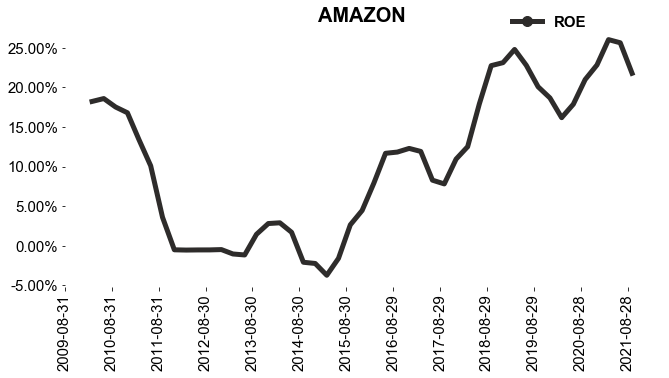

In [44]:
#SUBPLOT4
fig = plt.figure()
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=15)
tick_spacing = 365

ax = fig.add_subplot(1, 1, 1)
ax.plot(df_final['end'],df_final['ROE']*100,marker='o', linestyle='solid',linewidth=5,color='#2C2A29',alpha=0.99,label='ROE',markersize=1)
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.1),ncol=10,markerscale=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax.title.set_fontfamily('arial')
#ax.axis([Fecha_inicial, Fecha_final, 1.0, 9])
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
ax.xaxis.set_major_formatter(formatter)
plt.box(on=None)
plt.title('AMAZON',fontsize=20,weight="bold")

#plt.text(df_final['end'].iloc[-1],df_final['ROE'].iloc[-1], '{0:.2%}'.format(df_final['ROE'].iloc[-1]), color='#2C2A29', fontsize=15,weight='bold')

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=1.5, top=1.0)

plt.show()

In [45]:
#StockRepurchasedDuringPeriodValue
EarningsPerShareDiluted_list = fin_statment['facts']['us-gaap']['EarningsPerShareDiluted']['units']['USD/shares']
EarningsPerShareDiluted_df = pd.DataFrame(EarningsPerShareDiluted_list)


EarningsPerShareDiluted_df['start'] = pd.to_datetime(EarningsPerShareDiluted_df['start'])
EarningsPerShareDiluted_df['end'] = pd.to_datetime(EarningsPerShareDiluted_df['end'])
EarningsPerShareDiluted_df['dias'] = (EarningsPerShareDiluted_df['end']-EarningsPerShareDiluted_df['start']).dt.days

EarningsPerShareDiluted_df_to_plot = EarningsPerShareDiluted_df.dropna()
EarningsPerShareDiluted_df_to_plot = EarningsPerShareDiluted_df_to_plot[EarningsPerShareDiluted_df_to_plot['frame'].str.contains('CY')]
EarningsPerShareDiluted_df_to_plot = EarningsPerShareDiluted_df_to_plot[EarningsPerShareDiluted_df_to_plot['dias']<100]
EarningsPerShareDiluted_df_to_plot

,start,end,val,accn,fy,fp,form,filed,frame,dias
2,2008-04-01,2008-06-30,0.37,0001193125-09-154174,2009,Q2,10-Q,2009-07-24,CY2008Q2,90
4,2008-07-01,2008-09-30,0.27,0001193125-09-212134,2009,Q3,10-Q,2009-10-23,CY2008Q3,91
8,2009-01-01,2009-03-31,0.41,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q1,89
13,2009-04-01,2009-06-30,0.32,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q2,90
18,2009-07-01,2009-09-30,0.45,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q3,91
22,2009-10-01,2009-12-31,0.85,0001193125-11-016253,2010,FY,10-K,2011-01-28,CY2009Q4,91
26,2010-01-01,2010-03-31,0.66,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q1,89
32,2010-04-01,2010-06-30,0.45,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q2,90
38,2010-07-01,2010-09-30,0.51,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q3,91
43,2010-10-01,2010-12-31,0.91,0001193125-12-032846,2011,FY,10-K,2012-02-01,CY2010Q4,91


In [46]:
df_final = pd.merge(df_final,
                        EarningsPerShareDiluted_df_to_plot[['end','val']], 
                        left_on='end',right_on='end', how='left')

df_final = df_final.dropna()
df_final['val_y'] = df_final['val_y'].astype(float)
df_final['val'] = df_final['val'].astype(float)
df_final['Diluted_shares'] = df_final['val_y']/df_final['val']

In [50]:
df_final

,end,val_x,accn,fy,fp,form,filed,frame,val_y,cum_NI,ROE,val,Diluted_shares
6,2010-03-31,5618000000,0001193125-10-090367,2010,Q1,10-Q,2010-04-23,CY2010Q1I,2.990000e+08,1.024000e+09,0.182271,0.66,4.530303e+08
7,2010-06-30,5857000000,0001193125-10-164083,2010,Q2,10-Q,2010-07-23,CY2010Q2I,2.070000e+08,1.089000e+09,0.185931,0.45,4.600000e+08
8,2010-09-30,6397000000,0001193125-10-233883,2010,Q3,10-Q,2010-10-22,CY2010Q3I,2.310000e+08,1.121000e+09,0.175238,0.51,4.529412e+08
9,2010-12-31,6864000000,0001018724-14-000006,2013,FY,10-K,2014-01-31,CY2010Q4I,4.160000e+08,1.153000e+09,0.167978,0.91,4.571429e+08
10,2011-03-31,7347000000,0001193125-11-110197,2011,Q1,10-Q,2011-04-27,CY2011Q1I,1.300000e+08,9.840000e+08,0.133932,0.28,4.642857e+08
11,2011-06-30,7765000000,0001193125-11-197823,2011,Q2,10-Q,2011-07-27,CY2011Q2I,7.000000e+06,7.840000e+08,0.100966,0.01,7.000000e+08
12,2011-09-30,7766000000,0001193125-11-280739,2011,Q3,10-Q,2011-10-26,CY2011Q3I,-2.740000e+08,2.790000e+08,0.035926,-0.60,4.566667e+08
13,2011-12-31,7757000000,0001018724-15-000006,2014,FY,10-K,2015-01-30,CY2011Q4I,9.700000e+07,-4.000000e+07,-0.005157,0.21,4.619048e+08
14,2012-03-31,7271000000,0001193125-12-187203,2012,Q1,10-Q,2012-04-27,CY2012Q1I,1.300000e+08,-4.000000e+07,-0.005501,0.28,4.642857e+08
15,2012-06-30,7505000000,0001193125-12-317409,2012,Q2,10-Q,2012-07-27,CY2012Q2I,7.000000e+06,-4.000000e+07,-0.005330,0.01,7.000000e+08


In [49]:
import yfinance as yf
SYMBOL = "AMZN"

my_symbol = yf.Ticker(SYMBOL)
my_symbol_hist = my_symbol.history(period="max")
my_symbol_hist

SSLError: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/AMZN?period1=-631159200&period2=1649789315&interval=1d&includePrePost=False&events=div%2Csplits (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))